# Regressão Não Linear da Geração Distribuída no Brasil

Dados obtidos a partir dos dados livres (open data) da ANEEL a partir do site: https://dados.gov.br/dataset?license_id=other-pd&organization=agencia-nacional-de-energia-eletrica em Fevereiro/2021

In [9]:
from platform import python_version
print('Versão da Linguagem Python Usada:', python_version())

Versão da Linguagem Python Usada: 3.8.5


In [10]:
#Importa módulo csv
import numpy as np
from numpy import reshape
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib as mat
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
import seaborn as srn
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import statistics  as sts

In [11]:
# Leitura de arquivos csv


#leitor = pd.read_csv('GeracaoDistribuida.csv', encoding='unicode_escape', skiprows=[0])
leitor = pd.read_csv('GeracaoDistribuida.csv')
#import sys
#leitor.to_csv(sys.stdout, sep = '|')
leitor.columns =['ide','tipodegeracao', 'abreviatura', 'qtdUsina', 'PotInstkW', 'mes', 'ano', 'data']
leitor = leitor.drop(['data', 'tipodegeracao', 'mes'], axis=1)
leitor = leitor.sort_values('ano', ascending = True)
leitor



,ide,abreviatura,qtdUsina,PotInstkW,ano
90,91,UFV,1,0.50,2007
54,55,CGH,0,0.00,2007
18,19,EOL,0,0.00,2007
126,127,UTE,0,0.00,2007
0,1,EOL,0,0.00,2008
...,...,...,...,...,...
35,36,EOL,0,0.00,2019
27,28,EOL,0,0.00,2019
17,18,EOL,0,0.00,2019
125,126,UTE,9,4024.96,2019


In [12]:
print(leitor.columns)

Index(['ide', 'abreviatura', 'qtdUsina', 'PotInstkW', 'ano'], dtype='object')


In [13]:
leitor.isnull().sum()

ide            0
abreviatura    0
qtdUsina       0
PotInstkW      0
ano            0
dtype: int64

In [14]:
mask = ((leitor['PotInstkW'] == 0.0)&(leitor['qtdUsina']==0.0))

leitor = leitor.loc[~mask]
leitor

#if leitor['abreviatura' == 'UFV']:
#  for i in leitor[:,4]:
#    leitor.groupby(['ano']).sum()
#return'''




,ide,abreviatura,qtdUsina,PotInstkW,ano
90,91,UFV,1,0.50,2007
72,73,UFV,1,25.00,2008
81,82,UFV,1,30.00,2010
92,93,UFV,1,9.90,2011
73,74,UFV,1,5.00,2011
...,...,...,...,...,...
99,100,UFV,17159,195142.31,2019
89,90,UFV,14854,167934.49,2019
63,64,CGH,6,2820.00,2019
53,54,CGH,16,21125.52,2019


In [15]:
grupoger = leitor.groupby(['abreviatura']).size()
grupoger

abreviatura
CGH    15
EOL    19
UFV    35
UTE    19
dtype: int64

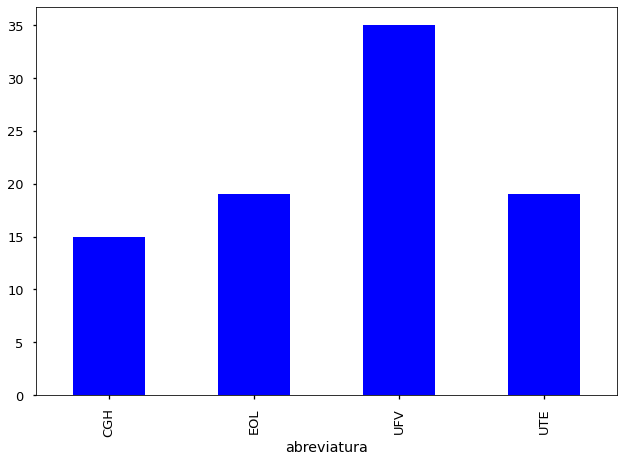

In [16]:
#Verificando quantidade de dados para cada geração
grupoger.plot.bar(color = 'blue')

In [17]:
a = print(leitor.describe())

              ide      qtdUsina      PotInstkW          ano
count   88.000000     88.000000      88.000000    88.000000
mean    77.590909   1032.784091   12640.077159  2015.625000
std     39.348030   3080.213959   34130.704865     2.422654
min      4.000000      1.000000       0.500000  2007.000000
25%     43.750000      3.000000      27.325000  2014.000000
50%     82.500000      6.000000    1151.110000  2016.000000
75%    105.250000     40.750000    5880.455000  2017.000000
max    143.000000  17159.000000  195142.310000  2019.000000


In [18]:
#Verificando se há dados duplicados
leitor[leitor.duplicated(['ide'],keep=False)]

,ide,abreviatura,qtdUsina,PotInstkW,ano


     ano   ide  qtdUsina  PotInstkW
0   2007    91         1    0.00050
1   2008    73         1    0.02500
2   2010    82         1    0.03000
3   2011   167         2    0.01490
4   2012   259         5    0.42394
5   2013   390        60    1.41716
6   2014   733       308    3.48418
7   2015   858      1477   11.87460
8   2016  1133      6800   74.30596
9   2017  1192     14034  181.74979
10  2018  1172     35238  429.78590
11  2019   678     32958  409.21486


Text(0.5, 1.0, 'Contexto da geração distribuída de 2007 a 2019')

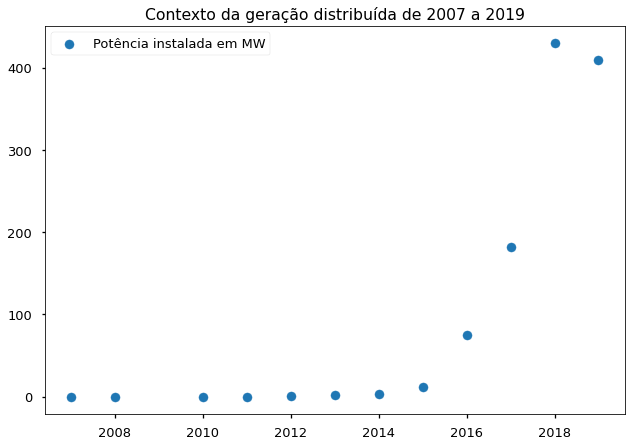

In [19]:
dados = leitor.set_index('ano')  
dados = leitor.drop(['ide'], axis=1)
dados = leitor.groupby(['ano']).sum()
dados = dados.reset_index('ano')
dados.PotInstkW = dados.PotInstkW/1000
dados.qtdUsina = dados.qtdUsina
print(dados)
plt.scatter(dados.ano, dados.PotInstkW, label = 'Potência instalada em MW')
#plt.scatter(dados.ano, dados.qtdUsina, label = 'Quantidade de empreendimentos')
plt.legend()
plt.title('Contexto da geração distribuída de 2007 a 2019')



In [20]:
leitor.ufv = leitor[(leitor['abreviatura'] == 'UFV')]
leitor.ufv = leitor.ufv.set_index('ano')  
leitor.ufv = leitor.ufv.drop(['ide'], axis=1)
grupo_ufv = leitor.ufv.groupby(['ano']).sum()
grupo_ufv = leitor.ufv.groupby(['ano']).sum()
grupo_ufv = grupo_ufv.reset_index('ano')

In [21]:
leitor.eol = leitor[(leitor['abreviatura'] == 'EOL')]
leitor.eol = leitor.eol.set_index('ano')  
leitor.eol = leitor.eol.drop(['ide'], axis=1)
grupo_eol = leitor.eol.groupby(['ano']).sum()
grupo_eol = leitor.eol.groupby(['ano']).sum()
grupo_eol = grupo_eol.reset_index('ano')

In [22]:
leitor.cgh = leitor[(leitor['abreviatura'] == 'CGH')]
leitor.cgh = leitor.cgh.set_index('ano')  
leitor.cgh = leitor.cgh.drop(['ide'], axis=1)
grupo_cgh = leitor.cgh.groupby(['ano']).sum()
grupo_cgh = leitor.cgh.groupby(['ano']).sum()
grupo_cgh = grupo_cgh.reset_index('ano')

In [23]:
leitor.ute = leitor[(leitor['abreviatura'] == 'UTE')]
leitor.ute = leitor.ute.set_index('ano')  
leitor.ute = leitor.ute.drop(['ide'], axis=1)
grupo_ute = leitor.ute.groupby(['ano']).sum()
grupo_ute = leitor.ute.groupby(['ano']).sum()
grupo_ute = grupo_ute.reset_index('ano')

Text(0.5, 1.0, 'Potência instalada dos empreendimentos de geração distribuída')

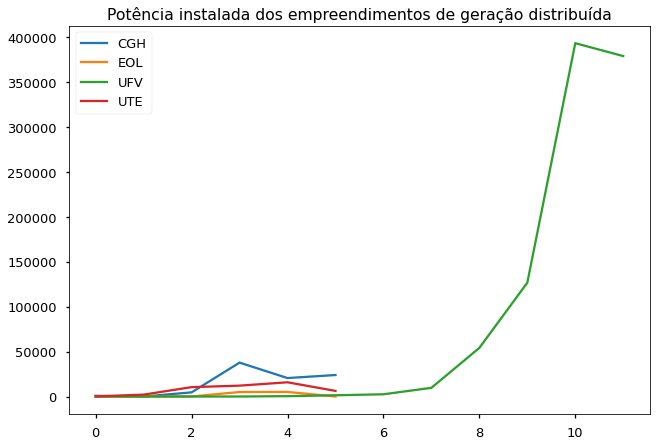

In [24]:
plt.plot(grupo_cgh['PotInstkW'], label = 'CGH')
plt.plot(grupo_eol['PotInstkW'], label = 'EOL')
plt.plot(grupo_ufv['PotInstkW'], label = 'UFV')
plt.plot(grupo_ute['PotInstkW'], label = 'UTE')
plt.legend()
plt.title('Potência instalada dos empreendimentos de geração distribuída')

Text(0.5, 1.0, 'Quantidade dos empreendimentos de geração distribuída')

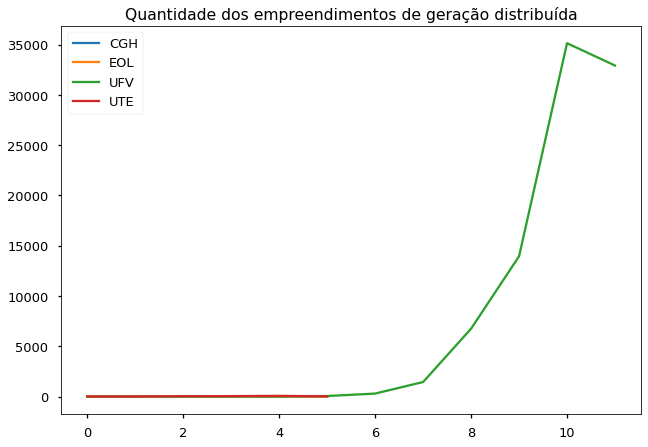

In [25]:
xlabel = 'Anos'
ylabel = 'Quantidade de empreendimentos'
plt.plot(grupo_cgh['qtdUsina'], label = 'CGH')
plt.plot(grupo_eol['qtdUsina'], label = 'EOL')
plt.plot(grupo_ufv['qtdUsina'], label = 'UFV')
plt.plot(grupo_ute['qtdUsina'], label = 'UTE')
plt.legend()
plt.title('Quantidade dos empreendimentos de geração distribuída')

In [26]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

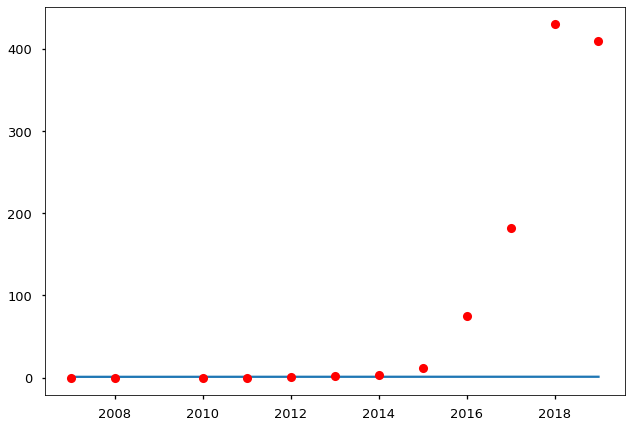

In [27]:
beta_1 = 0.10
beta_2 = 1990

x_data, y_data = (dados["ano"].values, dados["PotInstkW"].values)

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)


#plot initial prediction against datapoints
plt.plot(x_data, Y_pred)
plt.plot(x_data, y_data, 'ro')

In [28]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 4739.476120, beta_2 = 0.999025


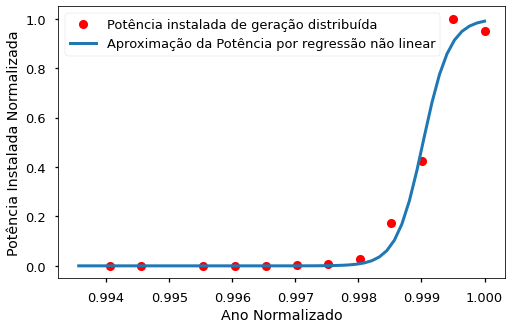

In [29]:
x = np.linspace(2007, 2020, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='Potência instalada de geração distribuída')
plt.plot(x,y, linewidth=3.0, label='Aproximação da Potência por regressão não linear')
plt.legend(loc='best')
plt.ylabel('Potência Instalada Normalizada')
plt.xlabel('Ano Normalizado')
plt.show()